# Zomato Data Analysis

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

## Problem Statement
In this notebook, we are going to analyze the restaurant business data. We want to study the food habbits of zomato users, their preferances, ratings etc. 

## Data description:

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• **Restaurant Id**: Unique id of every restaurant across various cities of the world

• **Restaurant Name**: Name of the restaurant

• **Country Code**: Country in which restaurant is located

• **City**: City in which restaurant is located

• **Address**: Address of the restaurant

• **Locality**: Location in the city

• **Locality Verbose**: Detailed description of the locality

• **Longitude**: Longitude coordinate of the restaurant's location

• **Latitude**: Latitude coordinate of the restaurant's location

• **Cuisines**: Cuisines offered by the restaurant

• **Average Cost for two**: Cost for two people in different currencies

• **Currency**: Currency of the country

• **Has Table booking**: yes/no

• **Has Online delivery**: yes/ no

• **Is delivering**: yes/ no

• **Switch to order menu**: yes/no

• **Price range**: range of price of food

• **Aggregate Rating**: Average rating out of 5

• **Rating color**: depending upon the average rating color

• **Rating text**: text on the basis of rating of rating

• **Votes**: Number of ratings casted by people


## There is another dataset which has the country codes in it

### Import Libraries

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read the data and merge the two different datasets

In [2]:
df = pd.read_csv("zomato.csv", encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
country = pd.read_csv("country_code.csv")
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
data = pd.merge(df, country, on = "Country Code", how = "inner")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Basic Data Study

In [5]:
#To check if ID is unique
data['Restaurant ID'].nunique()/len(data)

1.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [7]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
np.log(data['Country Code'])

0       5.087596
1       5.087596
2       5.087596
3       5.087596
4       5.087596
          ...   
9546    5.337538
9547    5.337538
9548    5.337538
9549    5.337538
9550    5.337538
Name: Country Code, Length: 9551, dtype: float64

### Number of Restaurants by Country on Zomato


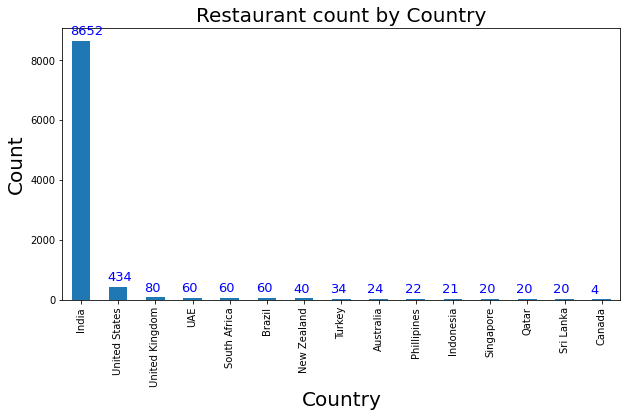

In [9]:
ax = data['Country'].value_counts().plot(kind = 'bar', figsize = (10,5))
plt.title("Restaurant count by Country", fontsize = 20)
plt.xlabel("Country", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
for idx, val in enumerate(data['Country'].value_counts()):
    plt.text(x = idx - 0.3,y = val +200, s=val, color='blue', fontsize=13)
plt.show()

### Which city has the maximum number of Restaurants?

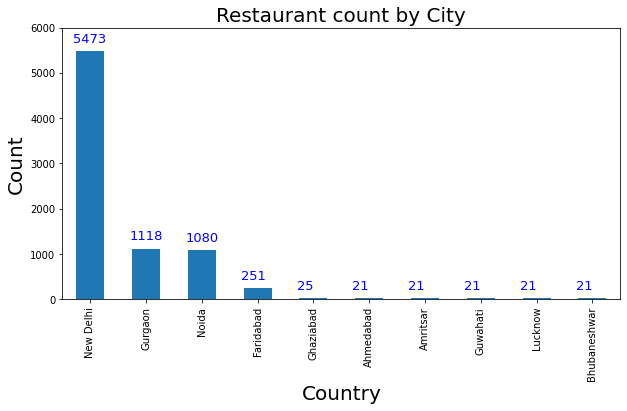

In [10]:
ax = data['City'].value_counts()[:10].plot(kind = 'bar', figsize = (10,5))
plt.title("Restaurant count by City", fontsize = 20)
plt.xlabel("Country", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.ylim(0, 6000)
for idx, val in enumerate(data['City'].value_counts()[:10]):
    plt.text(x = idx - 0.3,y = val +200, s=val, color='blue', fontsize=13)
plt.show()

### What is the condition of online delivery in India ?

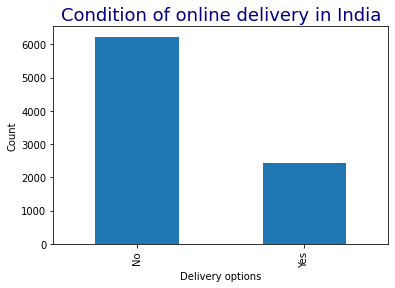

In [11]:
data[data['Country'] == 'India']['Has Online delivery'].value_counts().plot(kind = 'bar')
plt.title("Condition of online delivery in India", fontsize = 18, color = "navy")
plt.xlabel("Delivery options")
plt.ylabel("Count")
plt.show()

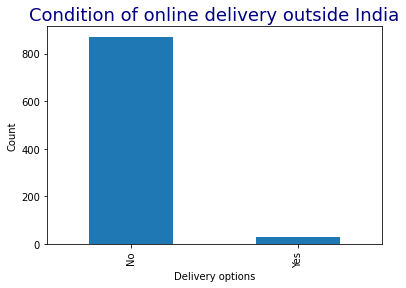

In [12]:
data[data['Country'] != 'India']['Has Online delivery'].value_counts().plot(kind = 'bar')
plt.title("Condition of online delivery outside India", fontsize = 18, color = "navy")
plt.xlabel("Delivery options")
plt.ylabel("Count")
plt.show()

### What are the top cuisines on Zomato?

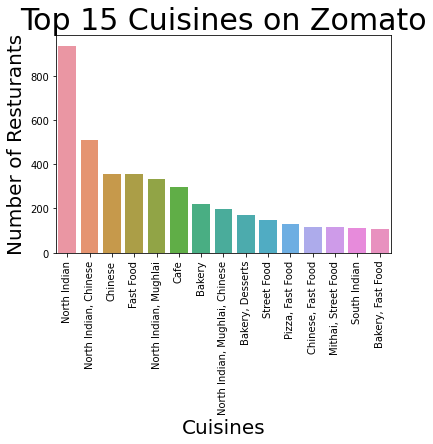

In [13]:
sns.barplot(data['Cuisines'].value_counts().index[:15], data['Cuisines'].value_counts()[:15])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

In [14]:
#Flatten the list of cuisines
cuisine_count = []

for v in data['Cuisines'].values:
    if isinstance(v, str):
        cus = v.split(",")
        for c in cus:
            cuisine_count.append(c)

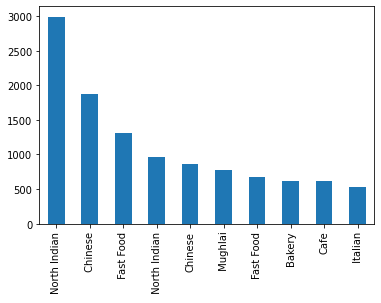

In [15]:
pd.Series(cuisine_count).value_counts()[:10].plot(kind = 'bar')
plt.show()

# A better way to find out these insights without writing much of the code.
## Pandas_profiling library

We need to check are we able to answer the above asked questions with it:

* Number of Restaurants by Country on Zomato
* Which city has the maximum number of Restaurants?
* What is the condition of online delivery in India ?
* What are the top cuisines on Zomato?

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [17]:
profile

Number of variables,21
Number of observations,9551
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# Bivariate Analysis

### Average Ratings on Countries

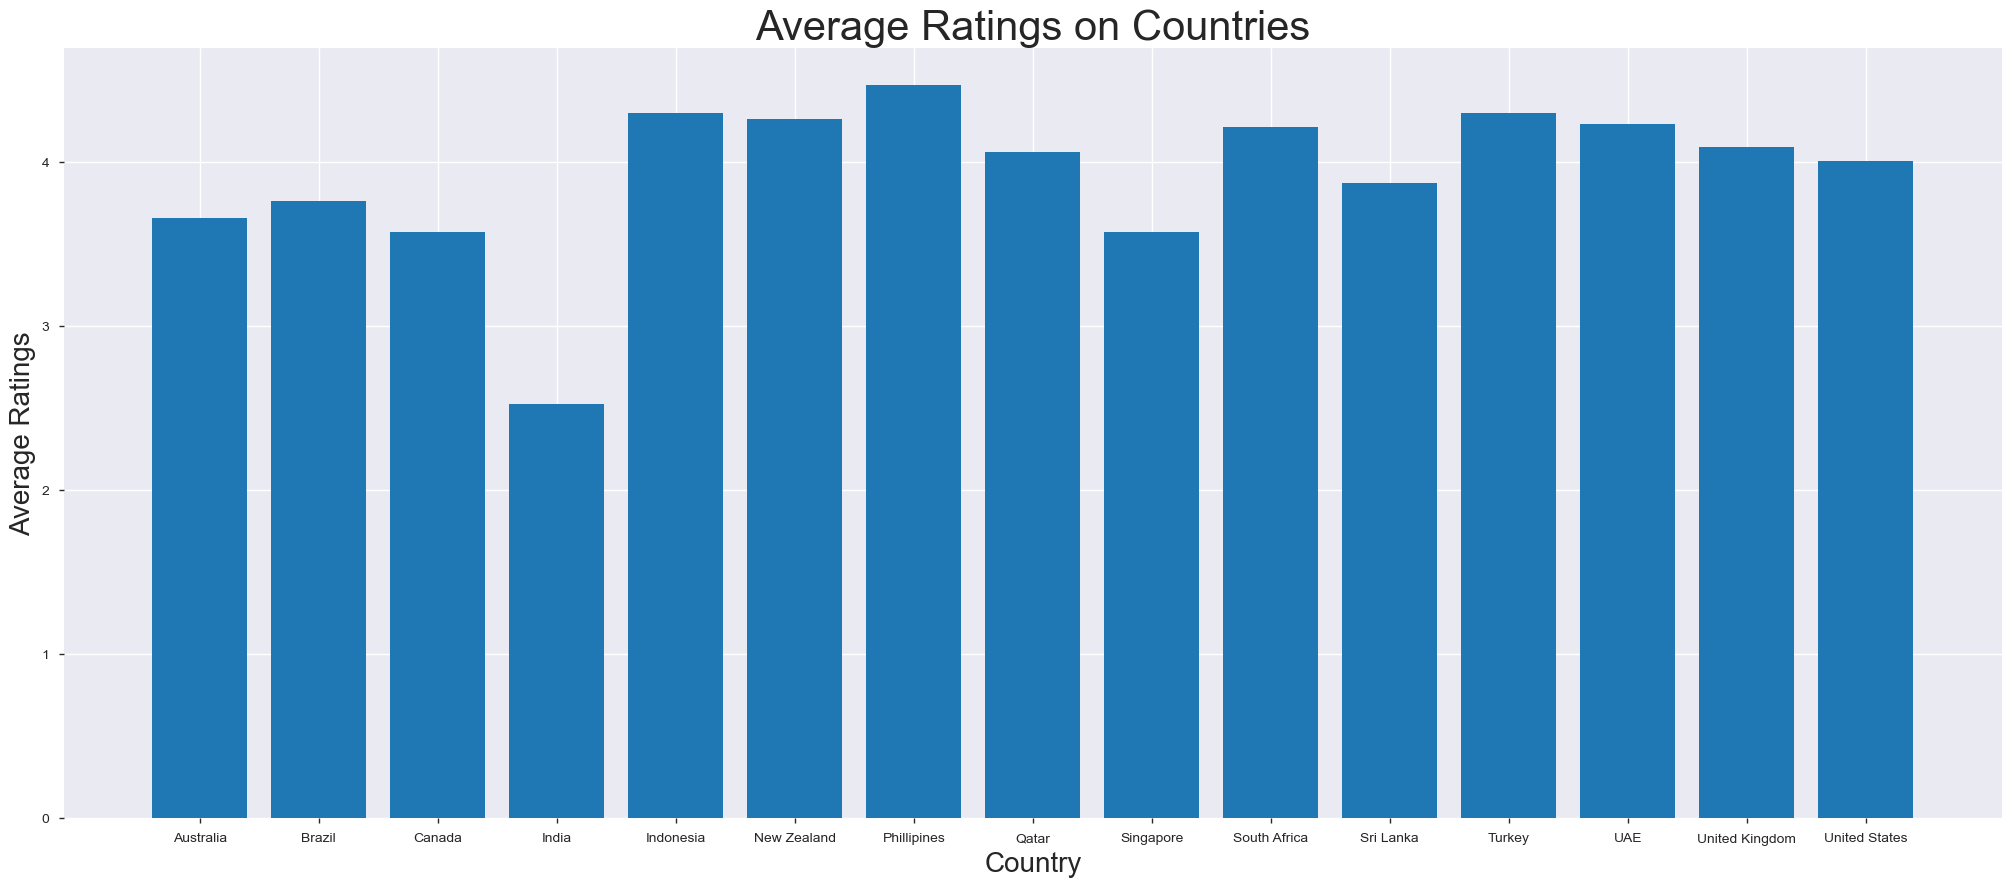

In [18]:
country_average = data.groupby('Country')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(25,10))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Average Ratings', fontsize=20)
plt.title('Average Ratings on Countries', fontsize=30)
plt.bar(country_average['Country'], country_average['Aggregate rating']);

**Is the restaurent industry so bad or is there something we are missing?**

### Plot the ratings histogram for Indian restaurents

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


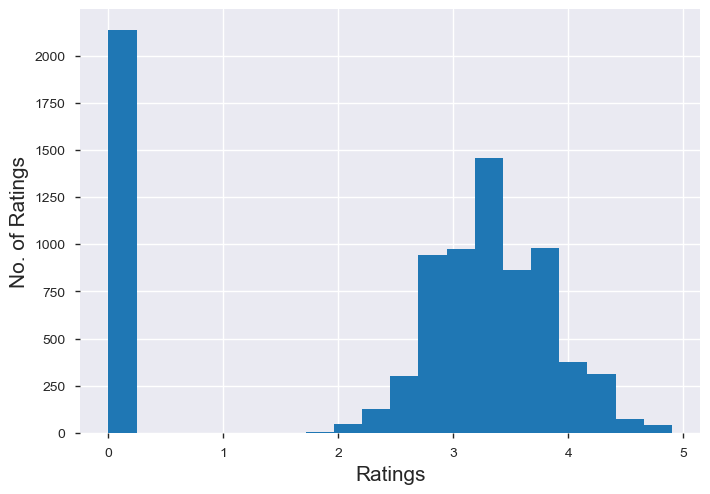

In [19]:
plt.hist(data[data['Country'] == 'India']['Aggregate rating'],bins = 20)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('No. of Ratings',fontsize= 15)
plt.show()

### More than 2000 restaurants have been rated 0. Check the rating text as well as the votes of these restaurants 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


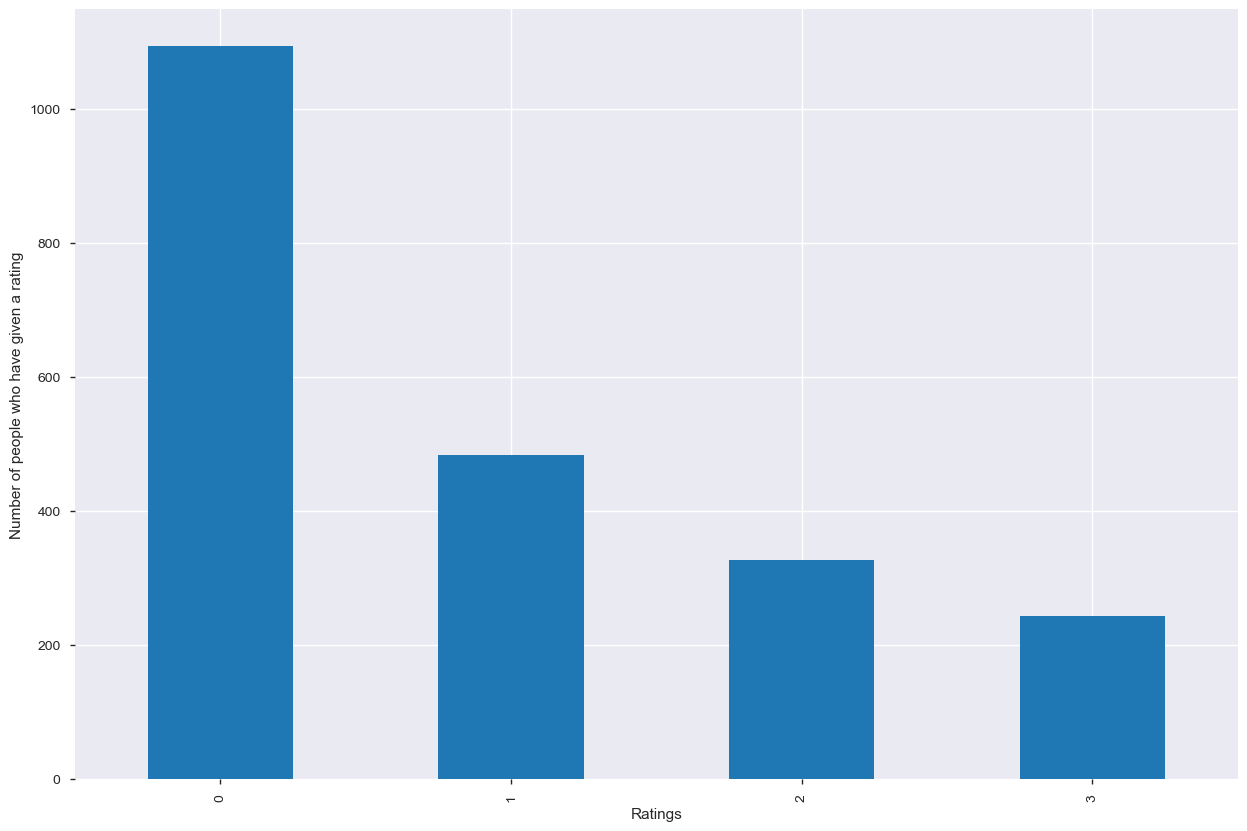

In [20]:
data[data['Aggregate rating'] == 0]['Votes'].value_counts().plot(kind = 'bar',figsize =(15,10))
plt.xlabel('Ratings')
plt.ylabel('Number of people who have given a rating')
plt.show()

**As you can see, the average ratings is getting influenced by the fact that there are multiple restaurents which have less than 3 votes and mostly 0 votes. If you check the Rating text for these which says `Not Rated` as well**

# Word cloud for the most popular cuisines

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


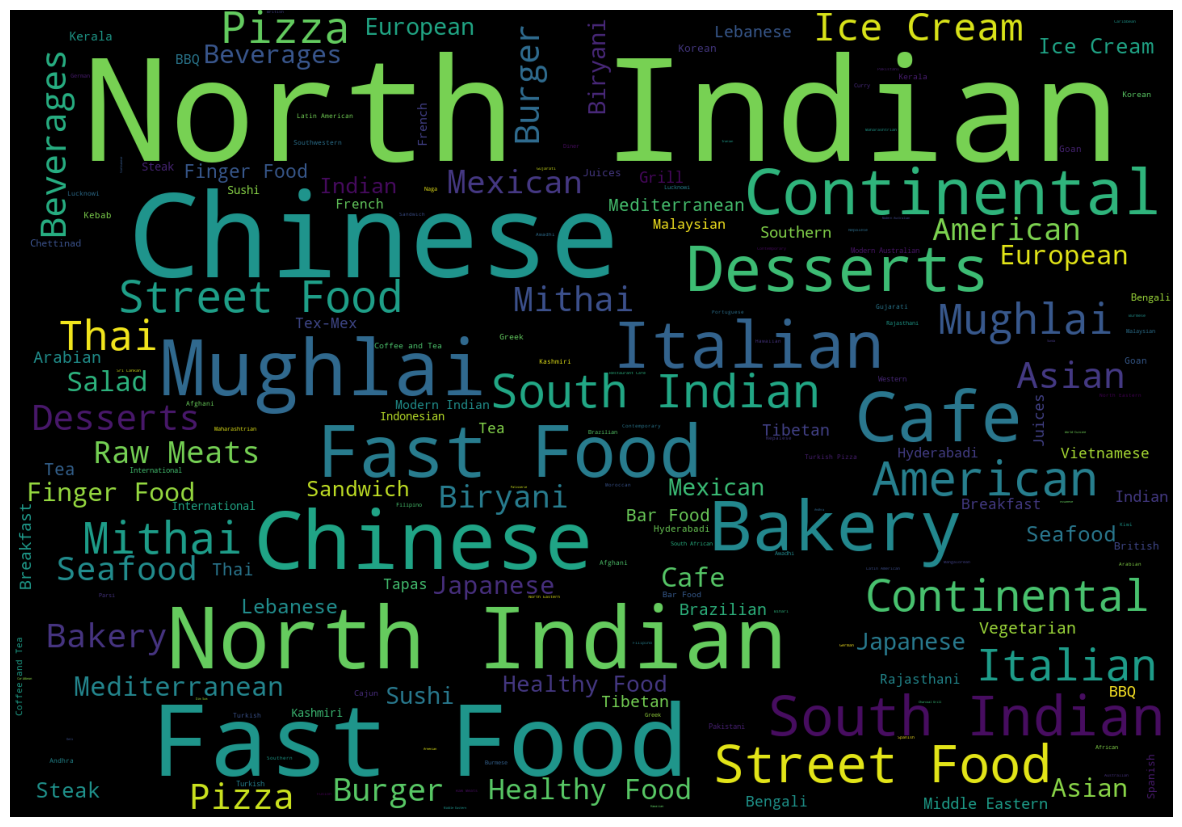

In [21]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1000, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(pd.Series(cuisine_count).value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## As evident from the WordCloud and our previous analysis, North Indian cuisine is the most savoured